In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-x-ray-10000-images/train_covid19.py
/kaggle/input/covid-19-x-ray-10000-images/covid19.model
/kaggle/input/covid-19-x-ray-10000-images/requirements.txt
/kaggle/input/covid-19-x-ray-10000-images/generate_images.py
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0266-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0253-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0265-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0243-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0217-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0223-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0227-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0235-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0218-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0216-0001.jpeg
/kaggle/input/c

In [2]:
DIR = "/kaggle/input/covid-19-x-ray-10000-images/dataset"
os.listdir(DIR)

['normal', 'covid']

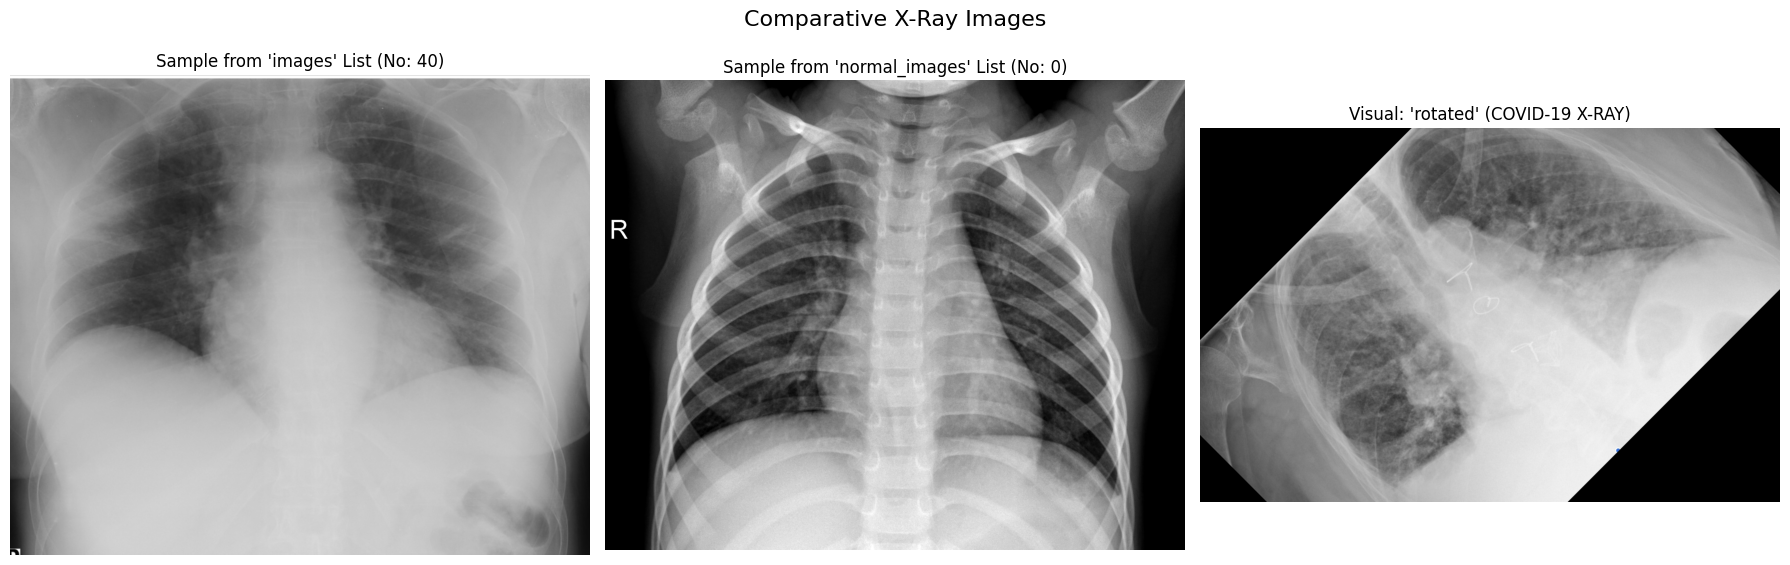

In [3]:
import cv2
import imutils
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
for img_path in glob.glob(DIR + '/*/*'):
    images.append(mpimg.imread(img_path))

normal_images = []
for img_path in glob.glob(DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))
image = cv2.imread("/kaggle/input/covid-19-x-ray-10000-images/dataset/covid/covid (25).jpeg")
rotated = imutils.rotate(image, 45)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Comparative X-Ray Images", fontsize=16)

if len(images) > 40:
    axes[0].imshow(images[40], cmap='gray')
    axes[0].set_title(f"Sample from 'images' List (No: 40)")
else:
    axes[0].set_title("'images' list does not have 40 elements")
axes[0].axis('off')

if len(normal_images) > 0:
    axes[1].imshow(normal_images[0], cmap='gray')
    axes[1].set_title(f"Sample from 'normal_images' List (No: 0)")
else:
    axes[1].set_title("'normal_images' list is empty")
axes[1].axis('off')

if image is not None:
    rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
    axes[2].imshow(rotated_rgb)
    axes[2].set_title("Visual: 'rotated' (COVID-19 X-RAY)")
else:
    axes[2].set_title("Error: 'image' could not be loaded")
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [4]:
from imutils import paths
imagePaths = list(paths.list_images(DIR))
print(imagePaths)

['/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0266-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0253-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0265-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0243-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0217-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0223-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0227-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0235-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0218-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0216-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0220-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0225-0001.jpeg', '/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-02

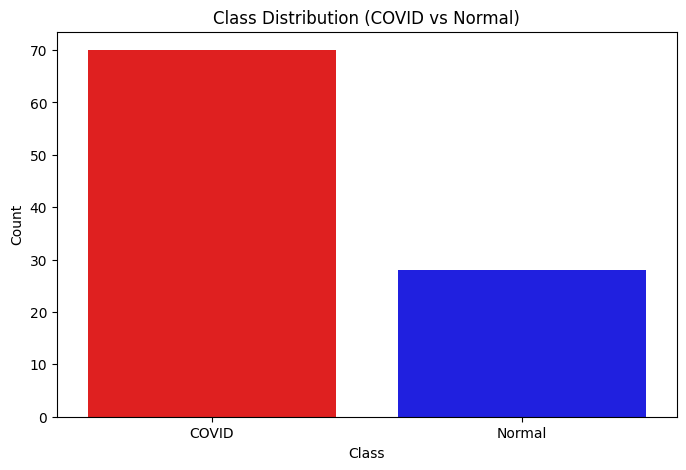

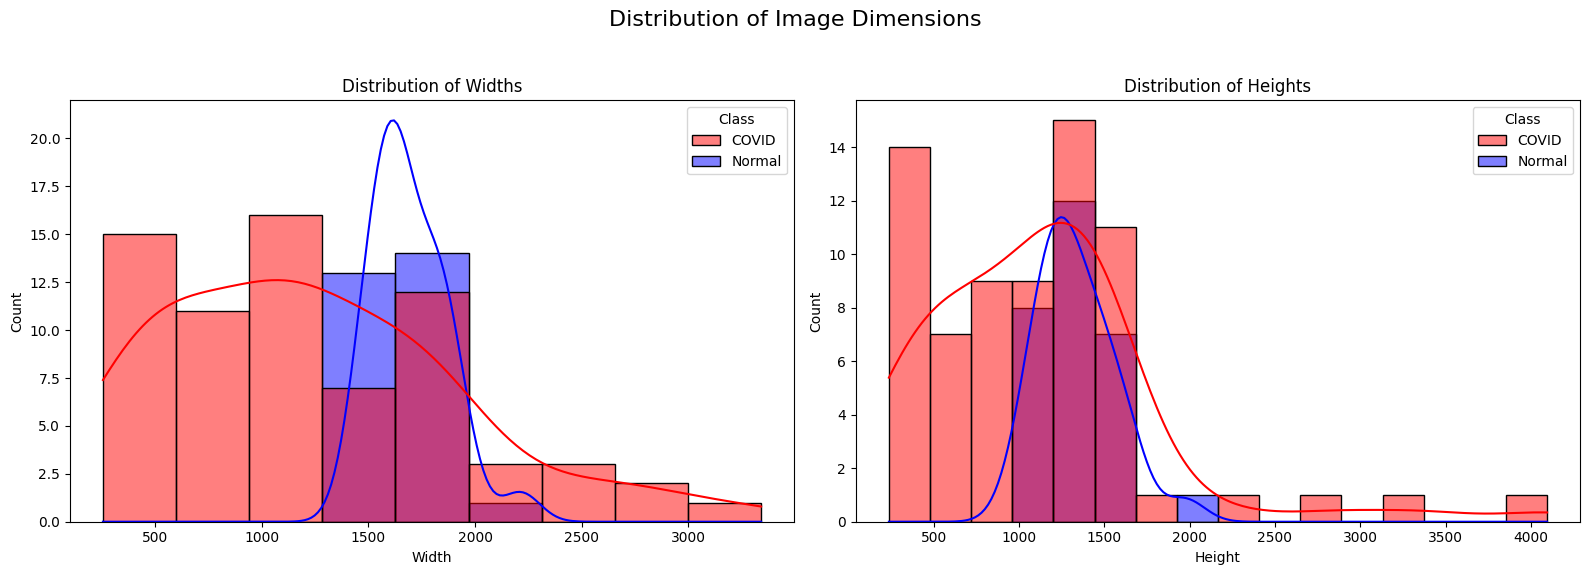

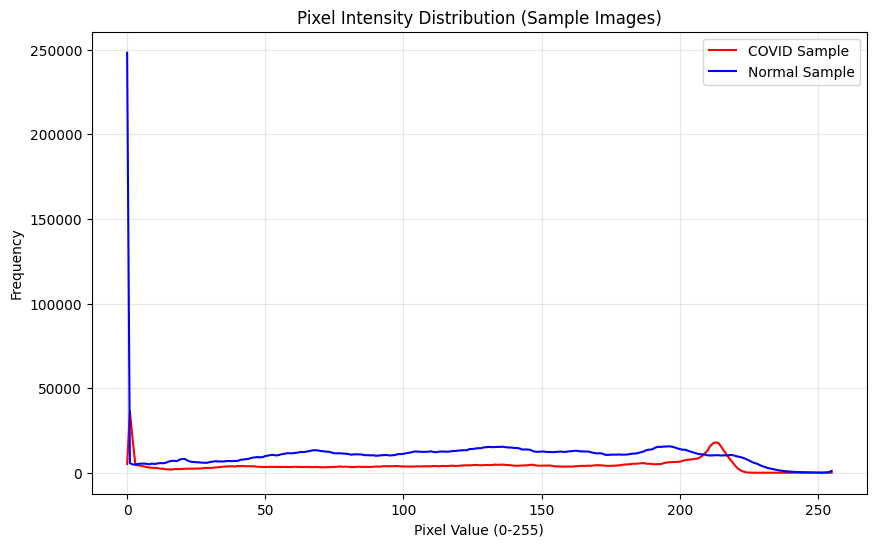

In [12]:
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
covid_paths = glob.glob(DIR + '/covid/*')
normal_paths = glob.glob(DIR + '/normal/*')
data = {
    'Class': ['COVID', 'Normal'],
    'Count': [len(covid_paths), len(normal_paths)]
}
df_counts = pd.DataFrame(data)
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Count', data=df_counts, palette=['red', 'blue'])
plt.title('Class Distribution (COVID vs Normal)')
plt.show()
dimensions = []

for img_path in covid_paths:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        h, w = img.shape
        dimensions.append([h, w, 'COVID'])

for img_path in normal_paths:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        h, w = img.shape
        dimensions.append([h, w, 'Normal'])
df_dims = pd.DataFrame(dimensions, columns=['Height', 'Width', 'Class'])
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Image Dimensions', fontsize=16)
sns.histplot(data=df_dims, x='Width', hue='Class', kde=True, ax=axes[0], palette=['red', 'blue'])
axes[0].set_title('Distribution of Widths')
sns.histplot(data=df_dims, x='Height', hue='Class', kde=True, ax=axes[1], palette=['red', 'blue'])
axes[1].set_title('Distribution of Heights')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
sample_covid_img = cv2.imread(covid_paths[0], cv2.IMREAD_GRAYSCALE)
sample_normal_img = cv2.imread(normal_paths[0], cv2.IMREAD_GRAYSCALE)

hist_covid = cv2.calcHist([sample_covid_img], [0], None, [256], [0, 256])
hist_normal = cv2.calcHist([sample_normal_img], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.plot(hist_covid, color='red', label='COVID Sample')
plt.plot(hist_normal, color='blue', label='Normal Sample')
plt.title('Pixel Intensity Distribution (Sample Images)')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [6]:
imagePaths = list(paths.list_images(DIR))
data = []
labels = []
for imagePath in imagePaths:
    
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (120, 120))
    data.append(image)
    labels.append(label)

In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
(X_train, X_val, Y_train, Y_val) = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=2)


2025-10-19 09:17:37.398452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760865457.810972      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760865457.927374      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
labels[:3]

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import warnings
import os
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Found 79 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6020 - loss: 0.9387 - mse: 0.2934 - val_accuracy: 0.2632 - val_loss: 0.9500 - val_mse: 0.3699
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 677ms/step - accuracy: 0.9127 - loss: 0.3146 - mse: 0.0666 - val_accuracy: 0.2632 - val_loss: 0.8544 - val_mse: 0.3264
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 768ms/step - accuracy: 0.9590 - loss: 0.1065 - mse: 0.0321 - val_accuracy: 0.7895 - val_loss: 0.5373 - val_mse: 0.1747
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 825ms/step - accuracy: 1.0000 - loss: 0.0474 - mse: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.4390 - val_mse: 0.1285
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 828ms/step - accuracy: 0.9590 - loss: 0.0813 - mse: 0.0208 - val_accuracy: 1.0000 - val_loss: 0.4076 - val_mse: 0.1166
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 667ms/step - accuracy: 0.9898 - loss: 0.0466 - mse: 0.0081 - val_accuracy: 0.7368 - val_loss:

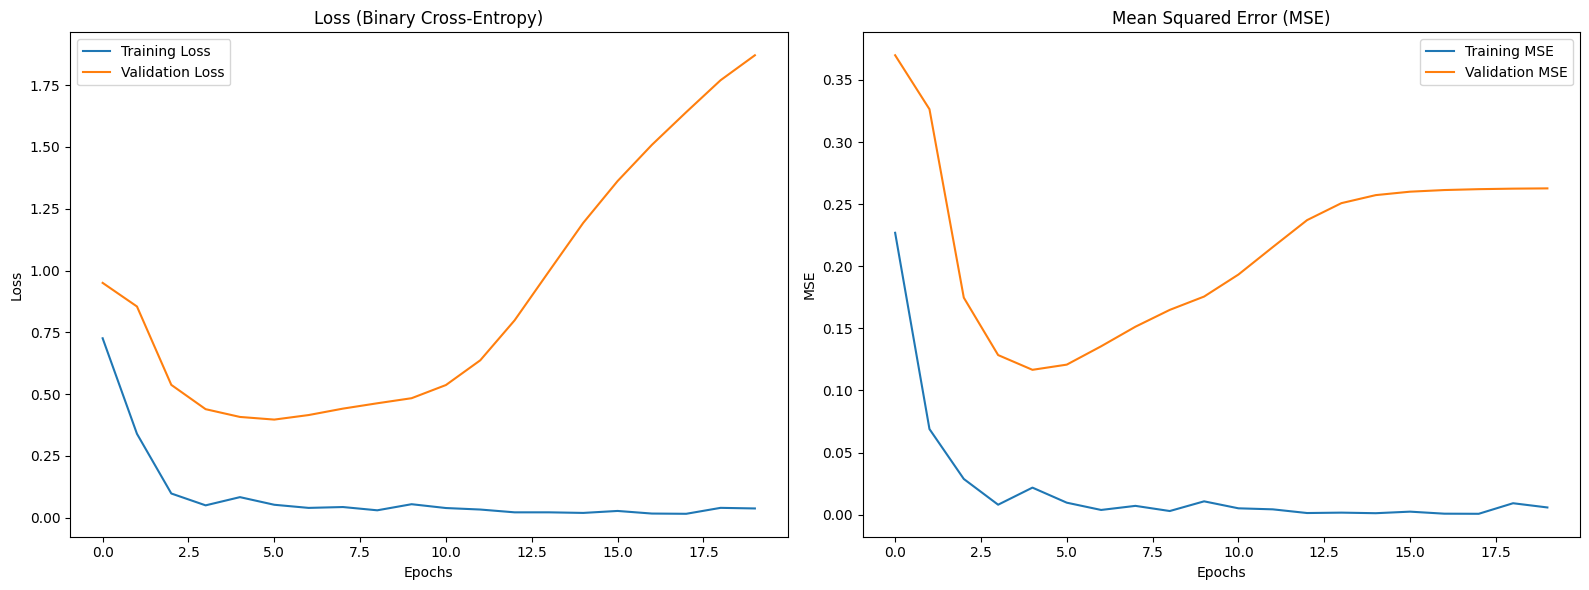

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'mse']
)

epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss (Binary Cross-Entropy)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(history.history['mse'], label='Training MSE')
axes[1].plot(history.history['val_mse'], label='Validation MSE')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MSE')
axes[1].legend()
plt.tight_layout()
plt.show()

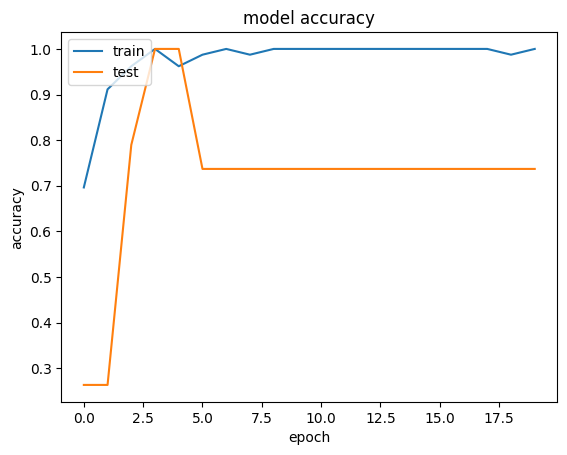

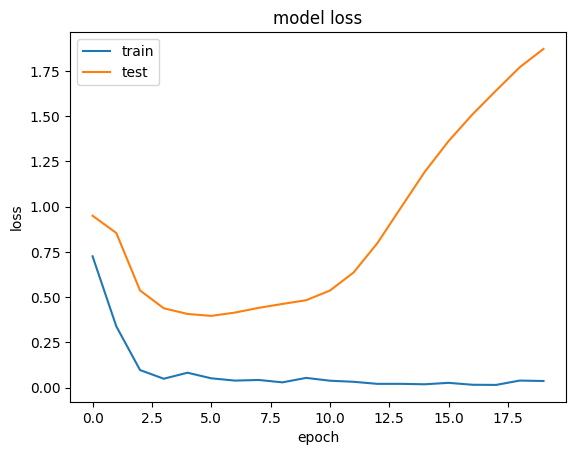

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 19 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


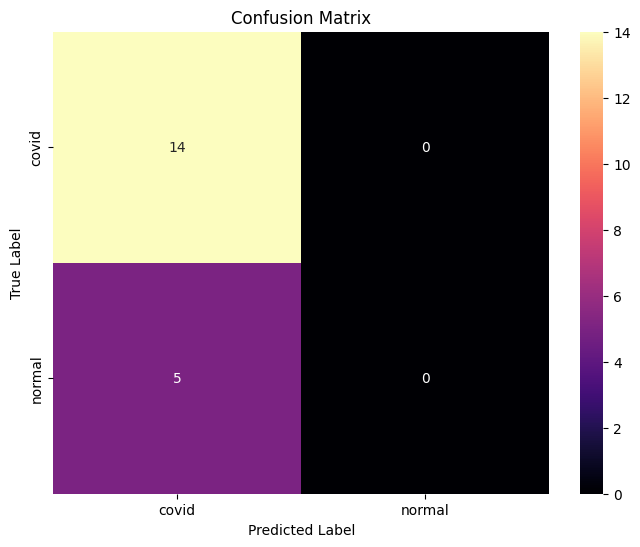

In [11]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
import os

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
pred_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_generator_for_cm = pred_datagen.flow_from_directory(
    DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

y_pred_probs = model.predict(validation_generator_for_cm)
y_true = validation_generator_for_cm.classes

y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)

class_labels = list(validation_generator_for_cm.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='magma',
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()